## Project Overview:
The "Loan Application Status Prediction" project aims to develop a predictive model that determines whether a loan applicant's loan will be approved or not based on a comprehensive set of applicant details. The dataset includes various independent variables such as gender, marital status, dependents, education, income-related attributes, credit history, and property area. The project falls under the classification problem category, as the goal is to categorize loan applications into two classes: approved or not approved.

Problem Type:
The problem at hand is a binary classification problem. Given a set of independent variables describing a loan applicant, the task is to build a predictive model that can accurately classify whether the loan application should be approved (Loan_Status = 'Y') or not (Loan_Status = 'N'). The available features, such as credit history, income, loan amount, and more, will serve as inputs for the model, while the loan status itself is the target variable that the model needs to predict. The predictive model will learn patterns from historical data to make informed predictions about the loan approval status for new applicants.

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the Data set

In [4]:
df = pd.read_csv('loan_prediction.csv')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##  Dataset Observations

The provided dataset contains information about loan applicants and their attributes. It consists of 614 entries with 13 columns. Each column represents a different attribute associated with the loan applicants. Below are the observations for each column:

1. **Loan_ID**: This column serves as a unique identifier for each applicant's loan application.

2. **Gender**: This column indicates the gender of the applicant. It has 601 non-null values, suggesting that there are some missing values.

3. **Married**: This column indicates whether the applicant is married or not. It has 611 non-null values, indicating a few missing values.

4. **Dependents**: This column represents the number of dependents the applicant has. It has 599 non-null values, indicating missing values.

5. **Education**: This column indicates the education level of the applicant. All 614 entries have non-null values.

6. **Self_Employed**: This column indicates whether the applicant is self-employed or not. It has 582 non-null values, suggesting missing values.

7. **ApplicantIncome**: This column represents the income of the applicant. It is of type int64 and has no missing values.

8. **CoapplicantIncome**: This column represents the income of the co-applicant, if applicable. It is of type float64 and has no missing values.

9. **LoanAmount**: This column indicates the loan amount applied for. It is of type float64 and has missing values (592 non-null values).

10. **Loan_Amount_Term**: This column indicates the term of the loan amount in months. It is of type float64 and has missing values (600 non-null values).

11. **Credit_History**: This column represents the credit history of the applicant. It is of type float64 and has missing values (564 non-null values).

12. **Property_Area**: This column indicates the area where the applicant's property is located. All 614 entries have non-null values.

13. **Loan_Status**: This column represents the target variable indicating whether the loan was approved or not. All 614 entries have non-null values.

Overall, the dataset contains a mix of categorical and numerical features, with several columns having missing values. The goal of the project is to predict the "Loan_Status" based on the available attributes using a classification model. Data preprocessing and handling missing values will likely be necessary before building the predictive model.

In [7]:
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 614
Number of Columns: 13


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.isnull().sum()*100 / 614

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

**The Dataset Contains Null Values**

### Handling the Missing Values

We are going to use different methods for Missing values when >5% and <5%

In [11]:
df = df.drop(['Loan_ID'],axis=1)

In [12]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [13]:
columns=['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [14]:
df=df.dropna(subset=columns)

In [16]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       48
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [18]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

**We are Going to fill the Missing Values of these columns with Mode**

In [19]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [20]:
df.isnull().sum()*100 / 614

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

**We can See all Missing Values have been Handeled**

## Handling Categorical Columns

In [27]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
66,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,N
65,Male,Yes,0,Graduate,No,5726,4595.0,258.0,360.0,1.0,Semiurban,N
287,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,1.0,Rural,Y
303,Male,Yes,1,Graduate,No,1625,1803.0,96.0,360.0,1.0,Urban,Y
137,Male,Yes,2,Graduate,Yes,3316,3500.0,88.0,360.0,1.0,Urban,Y


In [29]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [30]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0}).astype('int')

In [31]:
df['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
df['Married'] = df['Married'].map({'Yes':1,'No':0}).astype('int')

In [33]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [34]:
df['Dependents']=df['Dependents'].replace(to_replace='3+',value='4')

In [35]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [36]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [38]:
df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [39]:
df['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [40]:
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
df['Property_Area'] = df['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [41]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


**All the Categorical Columns have been Handeled and Converted to Int**

# Data Visualization

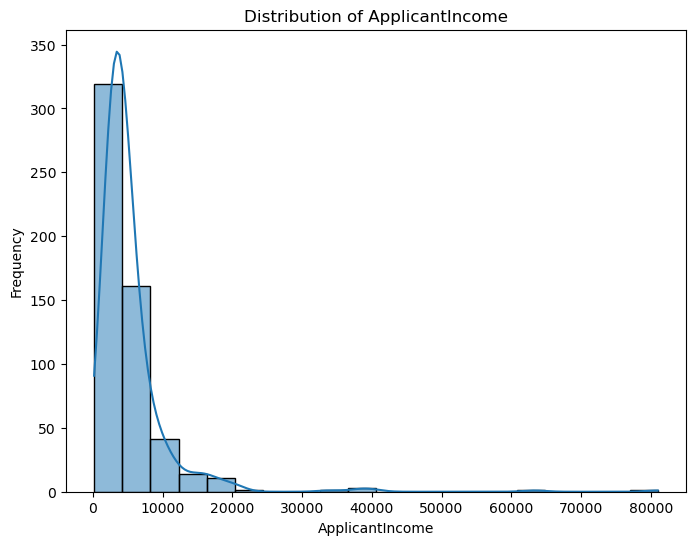

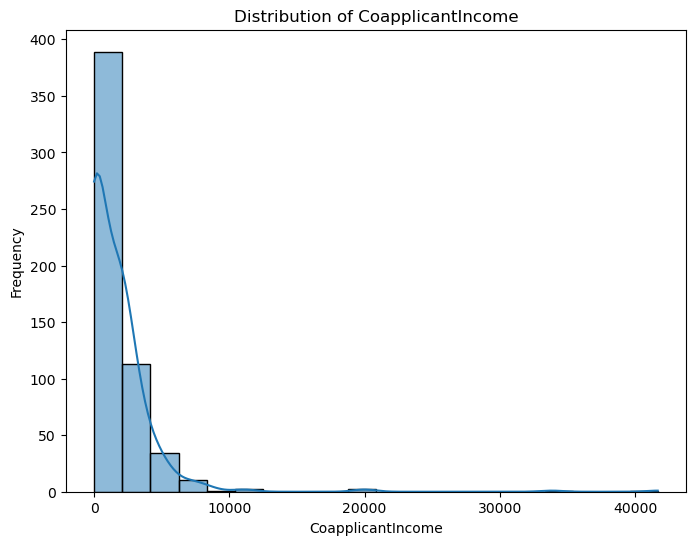

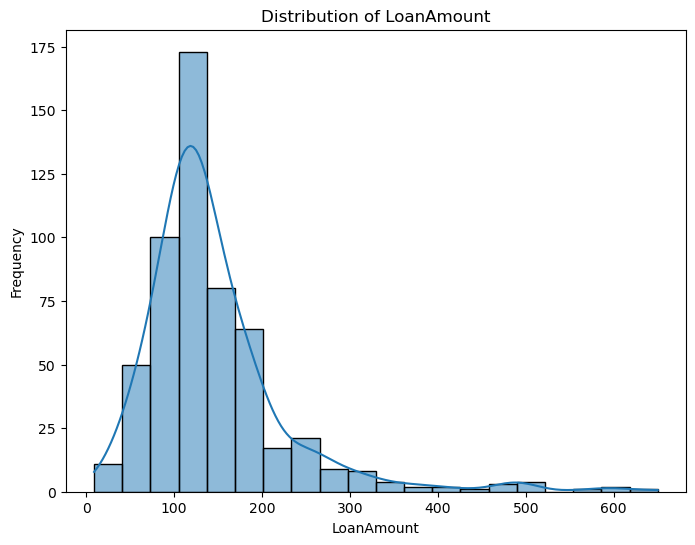

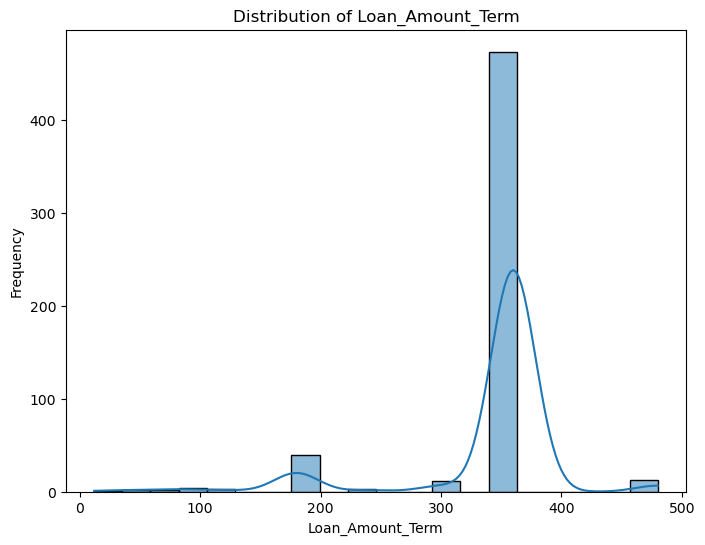

In [95]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Splitting Features - x and Target Variable - y

In [42]:
x = df.drop(['Loan_Status'],axis=1)

In [43]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [46]:
y=df['Loan_Status']

In [47]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32

## Feature Scaling Using Standard Scaler

In [48]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1


In [49]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [50]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x[cols]=st.fit_transform(x[cols])

In [51]:
x.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1


**We Can See Data has Been Scaled**

## Model Building

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [53]:
model_df={}
def model_val(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(x,y,cv=5)
    print(f"{model} Average Cross Val Score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)

### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model_val(model,x,y)

LogisticRegression() accuracy is 0.8018018018018018


InvalidParameterError: The 'estimator' parameter of check_scoring must be an object implementing 'fit'. Got      Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0        -0.128694   
2         1        1          0          1              1        -0.394296   
3         1        1          0          0              0        -0.464262   
4         1        0          0          1              0         0.109057   
5         1        1          2          1              1         0.011239   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0        -0.411075   
610       1        1          4          1              0        -0.208727   
611       1        1          1          1              0         0.456706   
612       1        1          2          1              0         0.374659   
613       0        0          0          1              1        -0.128694   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1            -0.049699   -0.214368          0.279961             1.0   
2            -0.545638   -0.952675          0.279961             1.0   
3             0.229842   -0.309634          0.279961             1.0   
4            -0.545638   -0.059562          0.279961             1.0   
5             0.834309    1.440866          0.279961             1.0   
..                 ...         ...               ...             ...   
609          -0.545638   -0.893134          0.279961             1.0   
610          -0.545638   -1.262287         -2.468292             1.0   
611          -0.466709    1.274152          0.279961             1.0   
612          -0.545638    0.488213          0.279961             1.0   
613          -0.545638   -0.154828          0.279961             0.0   

     Property_Area  
1                0  
2                1  
3                1  
4                1  
5                1  
..             ...  
609              0  
610              0  
611              1  
612              1  
613              2  

[553 rows x 11 columns] instead.

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

def model_val(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{model} accuracy is {accuracy_score(y_test, y_pred)}")
    
    score = cross_val_score(model, x, y, cv=5)
    print(f"{model} Average Cross Val Score is {np.mean(score)}")
    model_df[str(model)] = round(np.mean(score) * 100, 2)

logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
svc_model = SVC()
GradientBoosting_Classifier = GradientBoostingClassifier()

models_to_test = [
    logistic_model,
    decision_tree_model,
    random_forest_model,
    svc_model,
    GradientBoosting_Classifier
]

for model in models_to_test:
    model_val(model, x, y)

print("\nModel Scores:")
for model, score in model_df.items():
    print(f"{model}: {score}%")

LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Average Cross Val Score is 0.8047829647829647
DecisionTreeClassifier() accuracy is 0.7567567567567568
DecisionTreeClassifier() Average Cross Val Score is 0.708959868959869
RandomForestClassifier() accuracy is 0.7657657657657657
RandomForestClassifier() Average Cross Val Score is 0.7902702702702703
SVC() accuracy is 0.7927927927927928
SVC() Average Cross Val Score is 0.7938902538902539
GradientBoostingClassifier() accuracy is 0.7927927927927928
GradientBoostingClassifier() Average Cross Val Score is 0.774004914004914

Model Scores:
LogisticRegression(): 80.48%
DecisionTreeClassifier(): 70.9%
RandomForestClassifier(): 79.03%
SVC(): 79.39%
GradientBoostingClassifier(): 77.4%


## Hyper Parameter Tuning

In [58]:
from sklearn.model_selection import RandomizedSearchCV

**As the Model Scores for Logistic Regression, Random Forest Classifier and SVC and very close to each other,
we will perform Hyper Parameter Tuning on All Three Models to Choose the best one**

### Logistic Regression

In [62]:
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ['liblinear']}

rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, n_iter=20, cv=5, verbose=True)

rs_log_reg.fit(x, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [63]:
rs_log_reg.best_score_

0.8047829647829647

In [64]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

### SVC

In [67]:
svc_grid = {'C': [0.25, 0.50, 0.75, 1], 'kernel': ['linear']}
rs_svc = RandomizedSearchCV(SVC(), param_distributions=svc_grid, cv=5, n_iter=20, verbose=True)
rs_svc.fit(x, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [68]:
rs_svc.best_score_

0.8066011466011467

In [69]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

### Random Forest Classifier

In [77]:
rf_grid = {
    'n_estimators': np.arange(10, 1000, 10),
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 3, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 20, 50, 100],
    'min_samples_leaf': [1, 2, 5, 10]
}

rs_rf = RandomizedSearchCV(random_forest_model, param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)


In [79]:
rs_rf.fit(x, y)
best_score = rs_rf.best_score_
print(f"Best Cross-Validation Score: {best_score}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Cross-Validation Score: 0.8084357084357083


In [80]:
rs_rf.best_params_

{'n_estimators': 170,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 30}

## Save the Model

In [81]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [84]:
rf=RandomForestClassifier(n_estimators=170,
 min_samples_split=5,
 min_samples_leaf=5,
 max_features='sqrt',
 max_depth=30)

In [85]:
rf.fit(x,y)

RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=170)

In [86]:
import joblib

In [87]:
joblib.dump(rf,'loanStatusPrediction')

['loanStatusPrediction']

In [88]:
model=joblib.load('loanStatusPrediction')

In [91]:
import pandas as pd
dfn = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':1,
    'Self_Employed':0,
    'ApplicantIncome':25000,
    'CoapplicantIncome':0,
    'LoanAmount':50000,
    'Loan_Amount_Term':120,
    'Credit_History':1,
    'Property_Area':1},index=[0])

In [92]:
dfn

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,1,0,25000,0,50000,120,1,1


In [93]:
result=model.predict(dfn)

In [94]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Approved


# Conclusion 
Our Model is Successfully Predicting Whether Loan will be Sanctioned or Not